In [1]:
# Libraries
import json
import pandas as pd
import csv
import numpy as np
import numpy.random as random
import re

In [2]:
# set some constants here

tagged_columns = ['admiration', ' amusement', ' anger', ' annoyance', ' approval',
       ' caring', ' confusion', ' curiosity', ' desire', ' disappointment',
       ' disapproval', ' disgust', ' embarrassment', ' excitement', ' fear',
       ' gratitude', ' grief', ' joy', ' love', ' nervousness', ' optimism',
       ' pride', ' realization', ' relief', 'remorse', ' sadness', ' surprise',
       ' neutral', ' bad_string']



In [12]:
# reload full unstratified training data
train_df = pd.read_csv('data/training.csv', sep=',')
test_df = pd.read_csv('data/test.csv', sep=',')
val_df = pd.read_csv('data/val.csv', sep=',')

# aggregate all strings into one df
full_df = pd.concat([train_df,test_df,val_df])

print(full_df[full_df["tag_agreement"]>1].shape)

(73, 34)


In [4]:
# Calculate top tag with random for tiebreakers
full_df["top_tag"] = full_df[tagged_columns].idxmax(axis=1)
full_df.set_index("id")
# how many have conflicting tags?
def count_tie_tags(data):
    data["total_tags"] = data[tagged_columns].sum(axis=1)
    print(data[data["total_tags"] != data["tag_agreement"]].shape[0])
    
count_tie_tags(full_df)

# get how many total tags each string has
full_df["total_tags"] = full_df[tagged_columns].sum(axis=1)

# if the number of total tags is not the same as the tag agreement it means its  not just
# multiple people tagging the same
conflicted = full_df[full_df["total_tags"]!= full_df["tag_agreement"]]

# for each row that had a conflict
for index, row in conflicted.iterrows():
    # find the top count for tags
    top = row[tagged_columns].sort_values(ascending=False)
    # find all tags with the same frequency
    n_candidates = row[tagged_columns][row[tagged_columns] == top[0]]
    random_tag = random.choice(n_candidates.index)
    full_df.loc[index,"top_tag"] = random_tag
    

580


In [5]:
#stratified data from top tag
from sklearn.model_selection import train_test_split
test_split = 0.2
# Initial train and test split.
train_df_strat, test_df_strat = train_test_split(
    full_df,
    test_size=test_split,
    stratify=full_df['top_tag'],
)
# Splitting the test set further into validation and new test sets
val_df_strat = test_df_strat.sample(frac=0.5)
test_df_strat.drop(val_df_strat.index, inplace=True)
print(f"Number of rows in training set: {len(train_df_strat)}")
print(f"Number of rows in validation set: {len(val_df_strat)}")
print(f"Number of rows in test set: {len(test_df_strat)}")

Number of rows in training set: 1604
Number of rows in validation set: 201
Number of rows in test set: 193


/home/arm/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
train_df_strat.to_csv('data/strat_training.csv', sep=',')
test_df_strat.to_csv('data/strat_test.csv', sep=',')
val_df_strat.to_csv('data/strat_val.csv', sep=',')

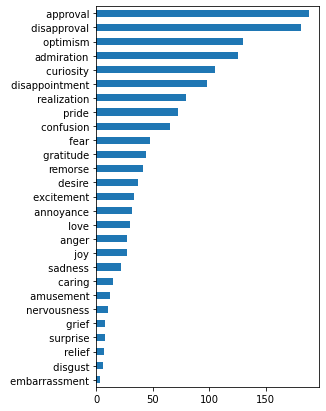

In [10]:
full_df['top_tag'].value_counts().tail(-1).plot(kind='barh',figsize=(4,7)).invert_yaxis()

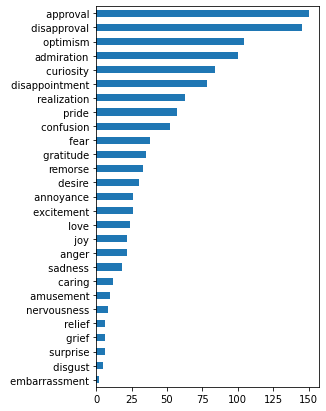

In [11]:
train_df_strat['top_tag'].value_counts().tail(-1).plot(kind='barh',figsize=(4,7)).invert_yaxis()

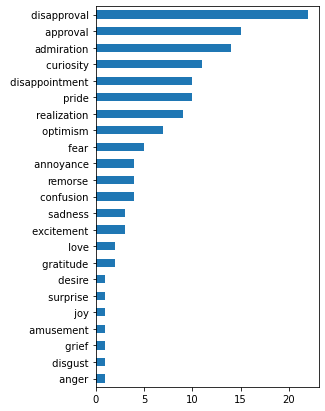

In [8]:
test_df_strat['top_tag'].value_counts().tail(-1).plot(kind='barh',figsize=(4,7)).invert_yaxis()

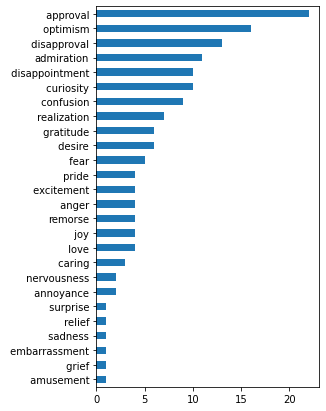

In [9]:

val_df_strat['top_tag'].value_counts().tail(-1).plot(kind='barh',figsize=(4,7)).invert_yaxis()